In [101]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
!pip install kneed
from kneed import KneeLocator

# Exercise 1: Clustering Method

In this exercise we will explore how each clustering algorithm discussed in the class works.

## Load Dataset

The dataset that we will use is a customer transaction in a certain mall. In this dataset there will 4 features including Gender, Age, Annual Income, and Spending Score. You can get the dataset from https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/mall_customers.csv

In [102]:
# load dataset and show the first five sample
df = pd.read_csv('https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/mall_customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [103]:
# rename the Annual Income (k$)	Spending Score (1-100) column
df.rename(columns={'Annual Income (k$)': 'AnnualIncome', 'Spending Score (1-100)': 'SpendingScore'}, inplace=True)
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [104]:
# describe data
df.describe()

,CustomerID,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [105]:
# Check for null values in the dataset
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
AnnualIncome,0
SpendingScore,0


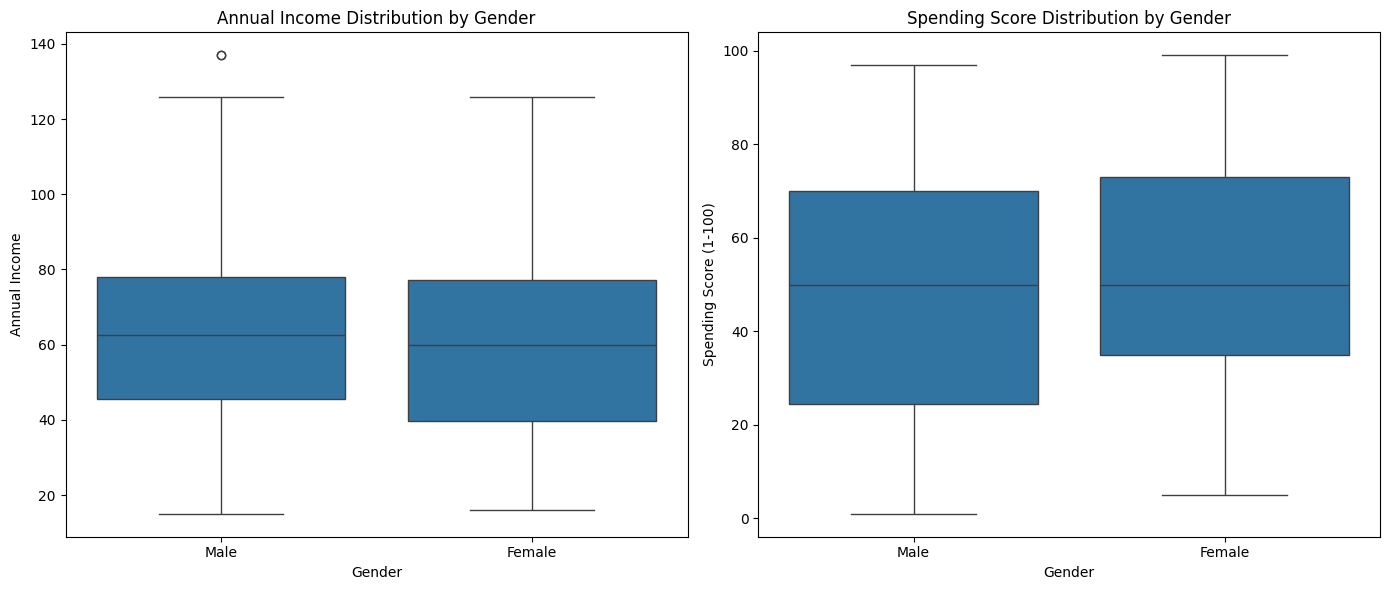

In [106]:
# make an insightful visualization and explain

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 1. Box Plot for Annual Income by Gender
sns.boxplot(data=df, x='Gender', y='AnnualIncome', ax=axes[0])
axes[0].set_title('Annual Income Distribution by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Annual Income')

# 2. Box plot for Spending Score by Gender
sns.boxplot(data=df, x='Gender', y='SpendingScore',  ax=axes[1])
axes[1].set_title('Spending Score Distribution by Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Spending Score (1-100)')

plt.tight_layout()
plt.show()

Annual Income Distribution by Gender:

The median annual income for both males and females is around 65 for males and 62 for females.

The interquartile range (IQR) for males is approximately from 45 to 80, while for females it is from 42 to 78.

There are a few outliers for males but none for females.

Spending Score Distribution by Gender:

Both males and females have a median spending score around 50.

The IQR for males is from 35 to 70, and for females from 35 to 75.



## Data Preprocessing

For this case study, we only use income and spending score

In [107]:
# create new dataframe that consist only annual income and spending score

df_new = df[['AnnualIncome', 'SpendingScore']]
df_new.head()

,AnnualIncome,SpendingScore
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Before we analyze our data, we need to scale the data. You can use MinMaxScaler or StandardScaler.

In [108]:
# scale dataset with standard scaler

from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
df_scaled = standard_scaler.fit_transform(df_new)

df_scaled_new = pd.DataFrame(df_scaled, columns=df_new.columns)
df_scaled_new.rename(columns={'AnnualIncome': 'income', 'SpendingScore': 'spending'}, inplace=True)

# Show the first few rows
df_scaled_new.head()

,income,spending
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [109]:
# get stastical information on the new dataset
df_scaled_new.describe()

,income,spending
count,2.000000e+02,2.000000e+02
mean,-2.131628e-16,-1.465494e-16
std,1.002509e+00,1.002509e+00
min,-1.738999e+00,-1.910021e+00
25%,-7.275093e-01,-5.997931e-01
50%,3.587926e-02,-7.764312e-03
75%,6.656748e-01,8.851316e-01
max,2.917671e+00,1.894492e+00


Then, we check the inisial position for our sample. You may use pairplot or scattered chart for the visualization option.

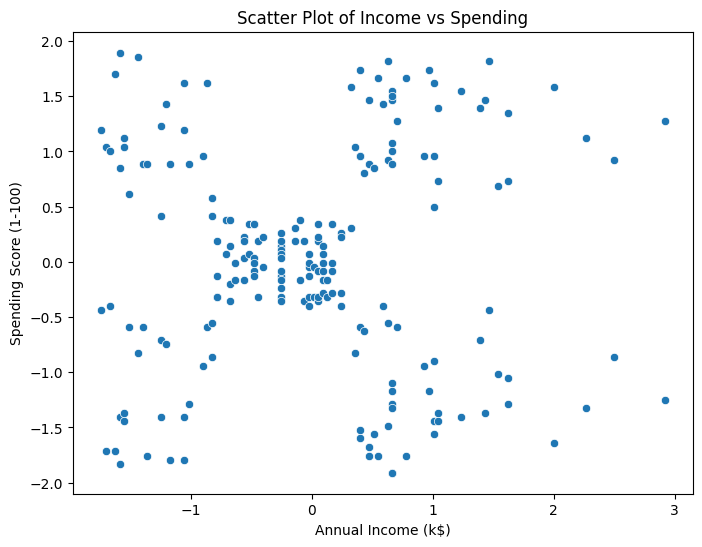

In [110]:
# Visualize the position
plt.figure(figsize=(8, 6))
plt.scatter(df_scaled_new['income'], df_scaled_new['spending'], edgecolor='white', linewidth=0.5)

# Adding title and labels
plt.title('Scatter Plot of Income vs Spending')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

# Show the plot
plt.show()

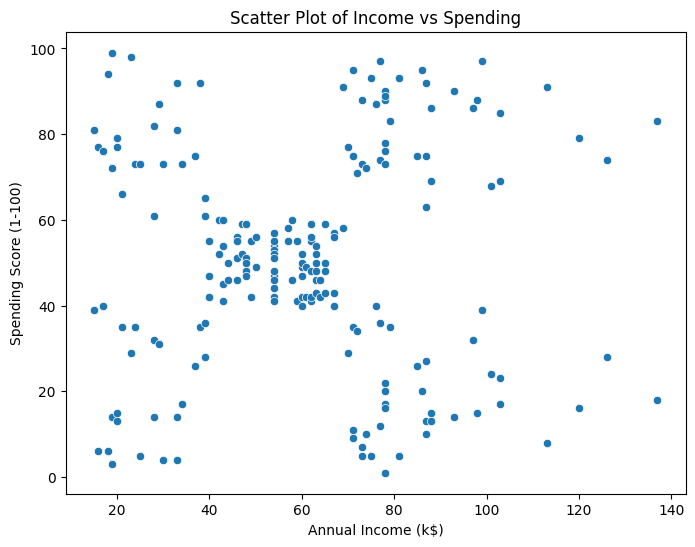

In [111]:
# Visualize the position using the original scale
plt.figure(figsize=(8, 6))
plt.scatter(df_new['AnnualIncome'], df_new['SpendingScore'], edgecolor='white', linewidth=0.5)

# Adding title and labels
plt.title('Scatter Plot of Income vs Spending')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

# Show the plot
plt.show()


## Clustering

The evaluation for chosing the number of K in KMEANS can be done by several methods such as elbow method.

1. using elbow method
In this case study, the below parameter settings is used:
- init: random
- range: (1,11)
- max_iter: 300
- random state: 42

In [112]:
# set the parameter for evaluating K
sse=[]
# check the inertia for each K
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='random',max_iter=300,random_state=42)
    kmeans.fit(df_scaled_new)
    sse.append(kmeans.inertia_)


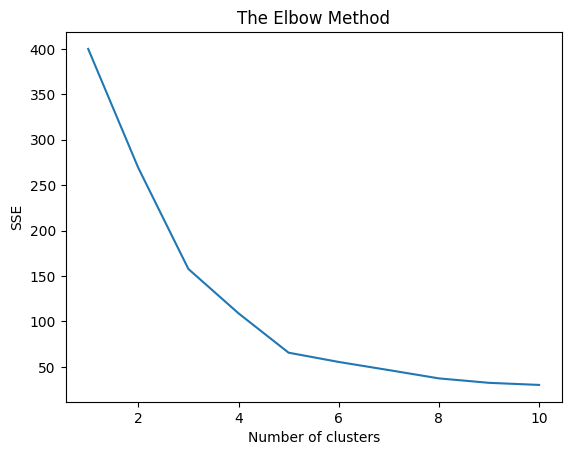

In [113]:
# manually visualize the elbow method using plotlib
plt.plot(range(1,11),sse)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [114]:
# using kneelocator to find the elbow/knee
kneedle = KneeLocator(range(1,11),sse,S=1.0,curve='convex',direction='decreasing')
print("The best k for you model is", kneedle.elbow)


The best k for you model is 5


### K-Means Algorithm

For using KMeans clustering algorithm, you need to define the number of cluster, initialization number, number of iteration, and random state.

In this case study, the below parameter settings is used:
- centroid initialization: random
- number of cluster: 5
- number of iteration: 300
- random state: 42

In [115]:
# assign cluster with K-Means algorithm
kmeans=KMeans(n_clusters=5,init='random',max_iter=300,random_state=42)
y_pred = kmeans.fit_predict(df_scaled_new)
y_pred


array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 4,
       0, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 2, 3, 4, 3, 2, 3, 2, 3,
       4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3], dtype=int32)

Visualize your result based on income and spending. You also can show the final position of the centroid.

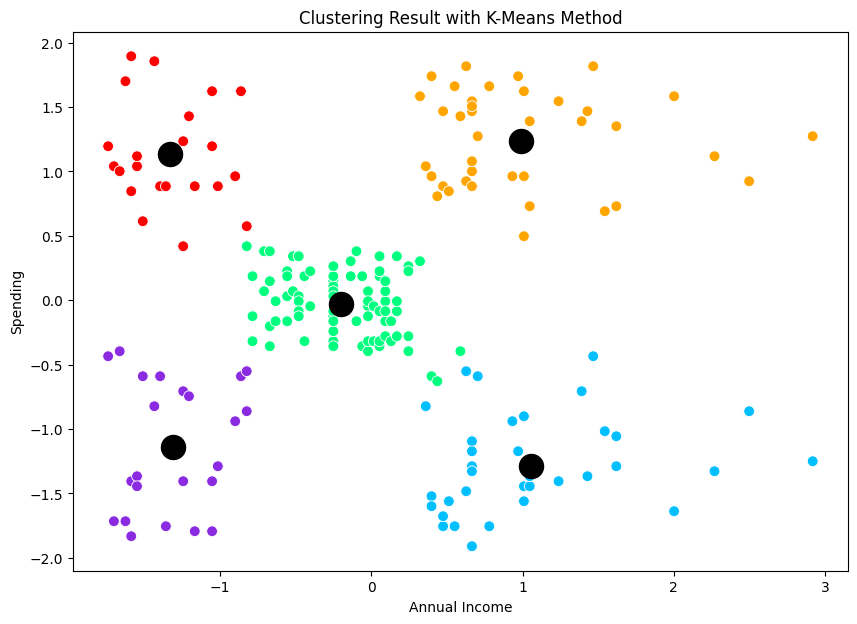

In [116]:
# visualize the result using scater chart
plt.figure(figsize=(10, 7))
sns.scatterplot(x='income', y='spending', hue=y_pred, palette=["blueviolet","red","deepskyblue","orange","springgreen"], legend=None, data=df_scaled_new, s=60)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black')
plt.title('Clustering Result with K-Means Method')
plt.xlabel('Annual Income')
plt.ylabel('Spending')
plt.show()

In [117]:
# Inverse transform the scaled data to get the original values
dfinverse = pd.DataFrame(standard_scaler.inverse_transform(df_scaled_new), columns=df_scaled_new.columns)
dfinverse.rename(columns={'income': 'AnnualIncome', 'spending': 'SpendingScore'}, inplace=True)
dfinverse['Cluster'] = y_pred
dfinverse.head()


,AnnualIncome,SpendingScore,Cluster
0,15.0,39.0,0
1,15.0,81.0,1
2,16.0,6.0,0
3,16.0,77.0,1
4,17.0,40.0,0


In [118]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster
cluster_summary = dfinverse.groupby('Cluster').agg({'SpendingScore': ['mean', 'std', 'min', 'max' ], 'AnnualIncome': ['mean','std', 'min', 'max']})
cluster_summary = cluster_summary.rename_axis('cluster')
cluster_summary

SpendingScore                        AnnualIncome                   \
                 mean        std   min   max         mean        std   min   
cluster                                                                      
0           20.913043  13.017167   3.0  40.0    26.304348   7.893811  15.0   
1           79.363636  10.504174  61.0  99.0    25.727273   7.566731  15.0   
2           17.114286   9.952154   1.0  39.0    88.200000  16.399067  70.0   
3           82.128205   9.364489  63.0  97.0    86.538462  16.312485  69.0   
4           49.518519   6.530909  34.0  61.0    55.296296   8.988109  39.0   

                
           max  
cluster         
0         39.0  
1         39.0  
2        137.0  
3        137.0  
4         76.0

Write down (by adding text) the results of your interpretation and provide suggestions on what steps the company can take based on the clustering results you have created.

### Summary of Clustering Results:
-  Cluster 0: Low income (26,304), low spending score (20.91), but with high spending variation.
- Cluster 1: Low income (25,727), high spending score (79.36), with low variation.
- Cluster 2: High income (88,200), low spending score (17.11), with high variation.
- Cluster 3: High income (86,538), high spending score (82.13), with low variation.
- Cluster 4: Moderate income (55,296), moderate spending score (49.52), with moderate variation.

### Suggestions:
- Cluster 0: Target with discounts and value products. Introduce loyalty programs.
- Cluster 1: Market affordable products, offer promotions to maintain engagement.
- Cluster 2: Focus on exclusive, premium offers. Highlight quality and prestige.
- Cluster 3: Offer luxury items and VIP services. Use high-end marketing strategies.
- Cluster 4: Promote balanced, value-for-money products. Use bundling and seasonal discounts.

### Next Steps:
- Implement personalized marketing and product offerings based on cluster behaviors.
- Focus on retention programs, especially for high-spending clusters (1 and 3).

<write here>